In [ ]:
import librosa
import numpy as np
import torchaudio
import pandas as pd

# Function to extract features from audio waveform
def extract_features_from_waveform(waveform, sample_rate):
    audio = waveform.numpy().flatten()  # Convert PyTorch tensor to numpy array
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate).T, axis=0)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=audio).T, axis=0)
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sample_rate).T, axis=0)
    return np.hstack([mfccs, chroma, zcr, spectral_contrast])

# Load a sample audio dataset from LibriSpeech
datasets = torchaudio.datasets.LIBRISPEECH(".", url="test-clean", download=True)

# Extract features from first 10 utterances
features = []
key = 0
for dataset in datasets:
    # Access audio sample and its metadata
    waveform, sample_rate, utterance, speaker_id, chapter_id, utterance_id = dataset
    
    # Extract features directly from waveform
    feature = extract_features_from_waveform(waveform, sample_rate)
    features.append(feature)  # Append feature array for each utterance  

# Convert the feature list to a numpy array for further processing
features_array = np.array(features)
print(f"Extracted features shape: {features_array.shape}")

# Convert np array into data freame 
features_df = pd.DataFrame(features_array)
features_df.to_csv("features.csv", index=False)


In [5]:
features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-300.538055,102.676567,-11.533751,34.515648,3.697970,3.740451,-7.779979,-5.030833,-1.161886,-0.948949,...,0.428673,0.454517,0.127497,19.646138,14.211446,16.890984,15.460212,17.686253,19.864507,14.851772
1,-364.247498,91.377350,4.104960,40.972740,3.855652,11.061490,-3.984364,-0.601738,4.034190,-2.416186,...,0.511107,0.555132,0.107820,18.037720,13.369277,16.100759,14.565921,16.484215,19.391356,14.970760
2,-303.546387,130.277008,-17.590935,26.203365,-7.220541,2.721291,-7.697184,-8.856187,1.239684,-1.230602,...,0.466134,0.469798,0.087339,21.492927,15.680788,17.941670,17.006381,17.779363,20.308019,14.854105
3,-313.242920,110.683128,-20.646511,21.182190,-5.369611,-9.688619,-9.589869,-7.087545,-10.202554,-2.014711,...,0.426402,0.498014,0.065348,21.618438,17.300488,20.150371,17.723875,18.778041,19.734620,16.104894
4,-298.868347,104.327721,-21.300791,29.336489,2.966362,-3.672034,-11.293174,-2.402841,-1.284240,0.897291,...,0.480502,0.447972,0.096332,20.960629,16.082848,17.179983,16.033419,19.139572,19.313629,15.433236


              precision    recall  f1-score   support

           0       0.97      0.96      0.96       208
           1       0.94      0.96      0.95       158
           2       0.97      0.97      0.97       158

    accuracy                           0.96       524
   macro avg       0.96      0.96      0.96       524
weighted avg       0.96      0.96      0.96       524

Accuracy: 0.9618320610687023


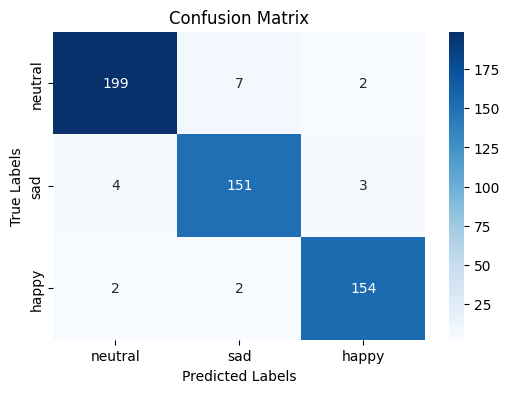

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = features_array  # Extracted features

# Generate dummy target labels
'''
neutral = 1 
sad = 2
happy = 3
'''

# Use K-Means to cluster features into 3 groups (neutral, sad, happy)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_array)

# Use cluster labels as your target labels
y = cluster_labels

# Assume `X` contains features and `y` contains emotion labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Define emotion labels
emotion_mapping = {1: 'neutral', 2: 'sad',3: 'happy',}

# neutral = 1 
# sad = 2
# happy = 3
# Assuming y_test and y_pred are defined
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=emotion_mapping.values(), yticklabels=emotion_mapping.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/10


C:\Users\komal\anaconda3\envs\stt-erp\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5041 - loss: 3.7636 - val_accuracy: 0.7920 - val_loss: 0.5753
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6894 - loss: 0.9109 - val_accuracy: 0.8473 - val_loss: 0.4572
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7178 - loss: 0.6677 - val_accuracy: 0.8378 - val_loss: 0.4700
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7641 - loss: 0.5486 - val_accuracy: 0.8321 - val_loss: 0.4281
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7644 - loss: 0.5312 - val_accuracy: 0.7405 - val_loss: 0.5844
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7820 - loss: 0.5197 - val_accuracy: 0.7710 - val_loss: 0.4923
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7937 - loss: 0.4973 - val_accuracy: 0.8073 - val_loss: 0.4322
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8038 - loss: 0.4656 - val_accuracy: 0.8511 - val_loss: 0.3734
Epo

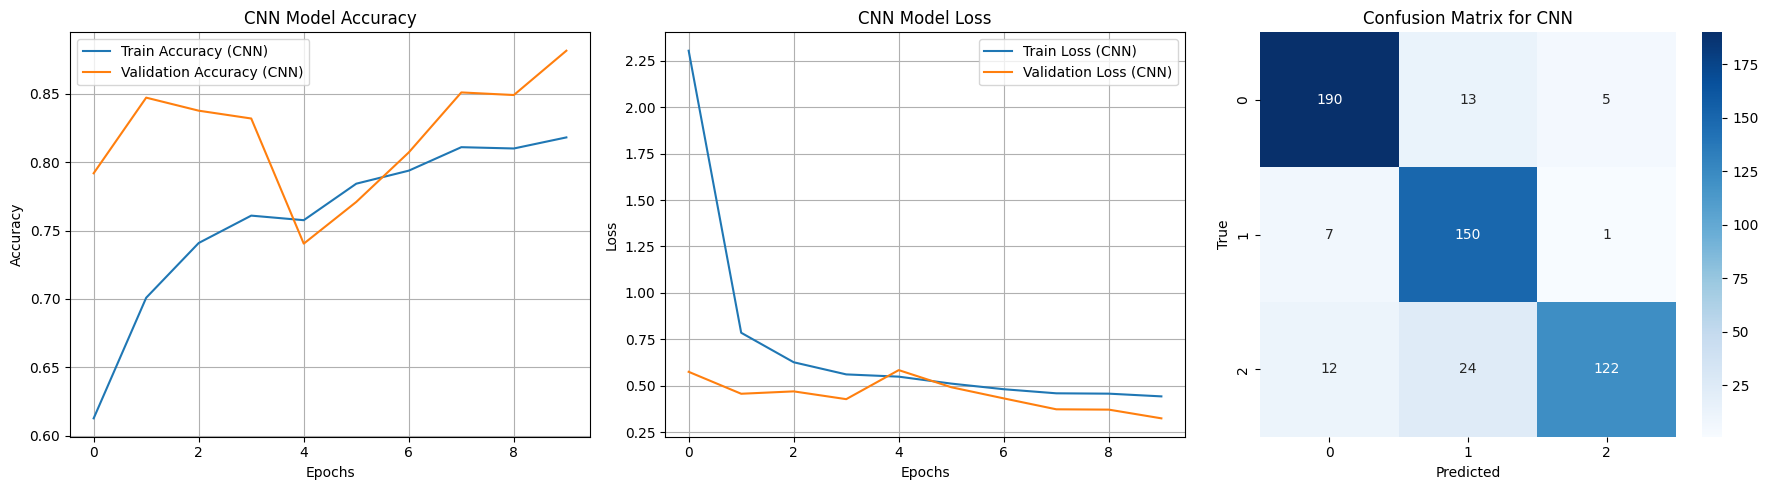

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Convert X_train and X_test to float32
X_train = X_train.astype(np.float32).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.astype(np.float32).reshape(X_test.shape[0], X_test.shape[1], 1)

# Re-train the model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1).numpy()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy for optimizer='adam', activation='relu', loss='sparse_categorical_crossentropy':")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# Create a figure with 1 row and 3 columns
plt.figure(figsize=(18, 5))

# Accuracy Plot
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy (CNN)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (CNN)')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss (CNN)')
plt.plot(history.history['val_loss'], label='Validation Loss (CNN)')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Confusion Matrix Plot
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted')
plt.ylabel('True')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Convert X_train and X_test to float32
X_train = X_train.astype(np.float32).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.astype(np.float32).reshape(X_test.shape[0], X_test.shape[1], 1)

#### CNN Model

Epoch 1/10


C:\Users\komal\anaconda3\envs\stt-erp\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5079 - loss: 1.9717 - val_accuracy: 0.6374 - val_loss: 0.8001
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6866 - loss: 0.7037 - val_accuracy: 0.7424 - val_loss: 0.5732
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7106 - loss: 0.6546 - val_accuracy: 0.7576 - val_loss: 0.5455
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7155 - loss: 0.6281 - val_accuracy: 0.8111 - val_loss: 0.4740
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7604 - loss: 0.5583 - val_accuracy: 0.8206 - val_loss: 0.4556
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7571 - loss: 0.5431 - val_accuracy: 0.7996 - val_loss: 0.4568
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7788 - loss: 0.5086 - val_accuracy: 0.8149 - val_loss: 0.4434
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7753 - loss: 0.5143 - val_accuracy: 0.8130 - val_loss: 0.4442
Epo

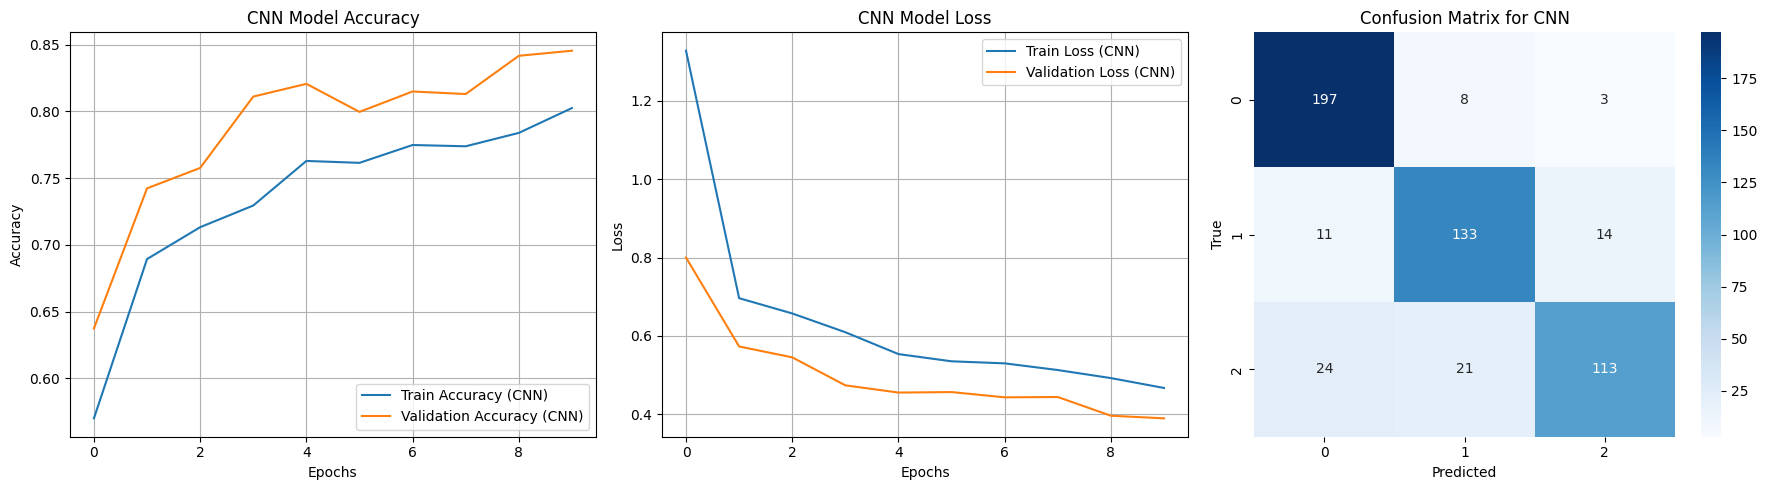

In [12]:
# Define CNN Model for Spectrogram Classification
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN Model
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate CNN Model
y_pred_cnn = cnn_model.predict(X_test)
y_pred_cnn = tf.argmax(y_pred_cnn, axis=1).numpy()
print("\nCNN Model Evaluation:")
print(classification_report(y_test, y_pred_cnn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_cnn):.2f}")

# Create a figure with 1 row and 3 columns
plt.figure(figsize=(18, 5))

# Accuracy Plot
plt.subplot(1, 3, 1)  # (rows, columns, panel number)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy (CNN)')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy (CNN)')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 3, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss (CNN)')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss (CNN)')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Confusion matrix for CNN
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.subplot(1, 3, 3)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix for CNN')
plt.xlabel('Predicted')
plt.ylabel('True')

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the combined plots
plt.show()


#### LSTM Model

Epoch 1/10


C:\Users\komal\anaconda3\envs\stt-erp\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.4040 - loss: 1.0790 - val_accuracy: 0.5782 - val_loss: 1.0958
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6108 - loss: 0.9586 - val_accuracy: 0.6450 - val_loss: 0.8182
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6619 - loss: 0.7985 - val_accuracy: 0.6584 - val_loss: 0.7648
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7003 - loss: 0.7171 - val_accuracy: 0.6985 - val_loss: 0.6979
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7163 - loss: 0.6648 - val_accuracy: 0.6966 - val_loss: 0.6684
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7104 - loss: 0.6464 - val_accuracy: 0.6927 - val_loss: 0.6731
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7326 - loss: 0.6349 - val_accuracy: 0.7061 - val_loss: 0.6497
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7098 - loss: 0.6339 - val_accuracy: 0.7099 - val_loss: 0.

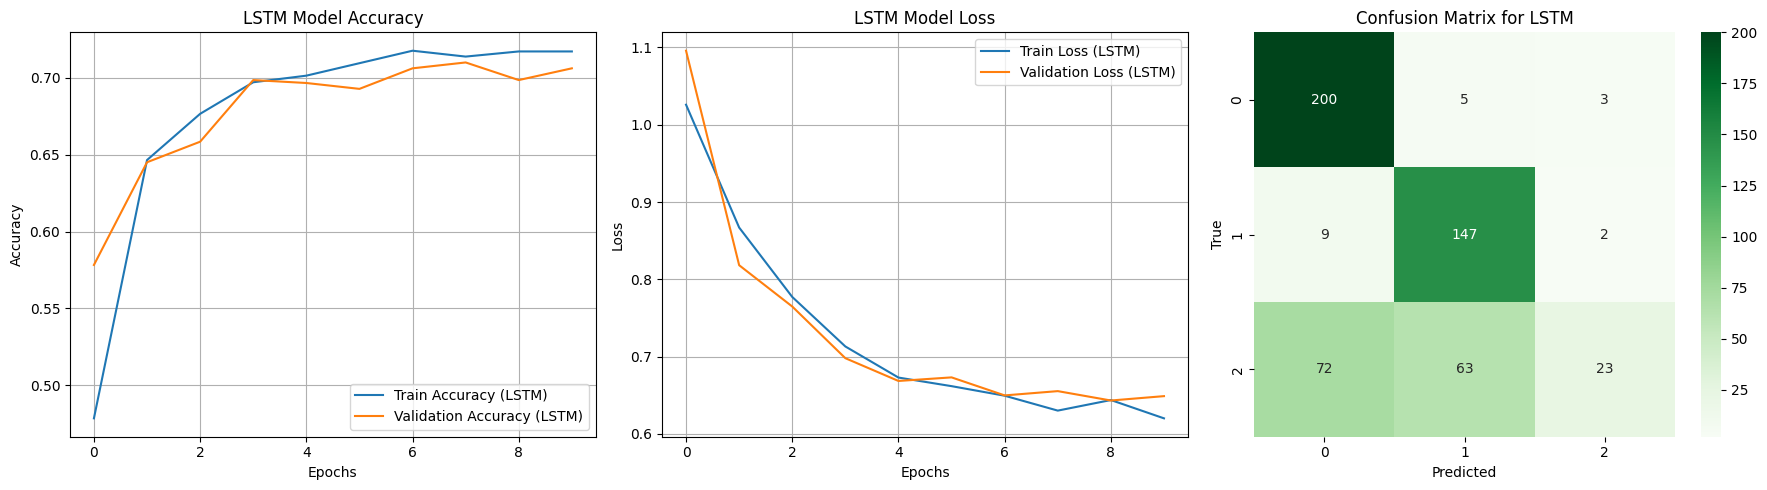

In [13]:
# Define LSTM Model for Sequential Data
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train LSTM Model
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate LSTM Model
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm = tf.argmax(y_pred_lstm, axis=1).numpy()
print("\nLSTM Model Evaluation:")
print(classification_report(y_test, y_pred_lstm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lstm):.2f}")

# Accuracy Plot for LSTM
# Create a figure with 1 row and 3 columns
plt.figure(figsize=(18, 5))

# Accuracy Plot
plt.subplot(1, 3, 1)  # (rows, columns, panel number)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy (LSTM)')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy (LSTM)')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot for LSTM
plt.subplot(1, 3, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss (LSTM)')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss (LSTM)')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


# Confusion matrix for LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.subplot(1, 3, 3)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix for LSTM')
plt.xlabel('Predicted')
plt.ylabel('True')

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the combined plots
plt.show()

In [14]:
# Select a random sample for prediction
idx = np.random.randint(0, X_test.shape[0])
sample = X_test[idx]

# CNN Prediction
cnn_pred = tf.argmax(cnn_model.predict(sample[np.newaxis]), axis=1).numpy()[0]

# LSTM Prediction
lstm_pred = tf.argmax(lstm_model.predict(sample[np.newaxis]), axis=1).numpy()[0]

print(f"True Label: {encoder.inverse_transform([y_test[idx]])[0]}")
print(f"CNN Prediction: {encoder.inverse_transform([cnn_pred])[0]}")
print(f"LSTM Prediction: {encoder.inverse_transform([lstm_pred])[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
True Label: 2
CNN Prediction: 2
LSTM Prediction: 1


Accuracy: 0.8816793893129771
Confusion Matrix:
 [[190  13   5]
 [  7 150   1]
 [ 12  24 122]]


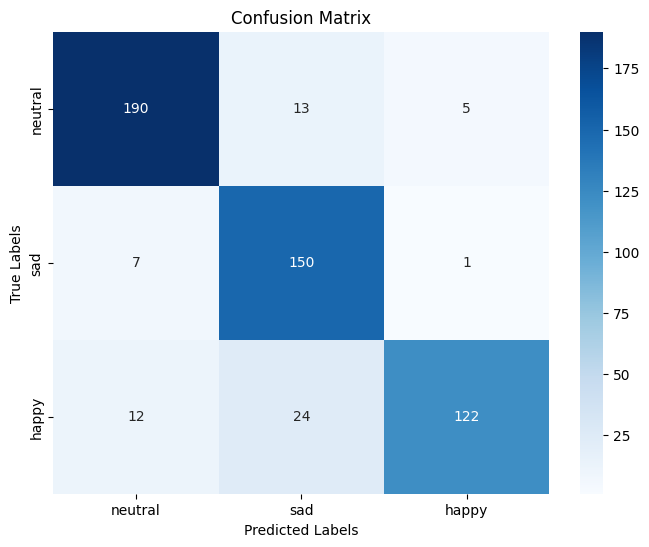

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Define emotion labels
emotion_mapping = {1: 'neutral', 2: 'sad',3: 'happy',}

# neutral = 1 
# sad = 2
# happy = 3
# Assuming y_test and y_pred are defined
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=emotion_mapping.values(), yticklabels=emotion_mapping.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [16]:
import torch
import torch.nn as nn

# Example LSTM Model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)  # LSTM output
        out = out[:, -1, :]    # Take the output of the last time step
        out = self.fc(out)
        return out

# Example Input: Sequential Features (Batch x Sequence Length x Input Size)
sequential_data = torch.randn(10, 50, 13)  # 10 samples, 50 time steps, 13 features per time step
model = LSTMClassifier(input_size=13, hidden_size=64, num_layers=2, num_classes=3)
output = model(sequential_data)
print(output)

tensor([[-0.0294,  0.0932,  0.1053],
        [-0.0484,  0.0811,  0.0934],
        [-0.0582,  0.0804,  0.0994],
        [-0.0425,  0.0808,  0.0949],
        [-0.0535,  0.0927,  0.0756],
        [-0.0426,  0.0923,  0.0750],
        [-0.0512,  0.0917,  0.0760],
        [-0.0530,  0.0963,  0.0893],
        [-0.0371,  0.0947,  0.0744],
        [-0.0447,  0.0753,  0.0882]], grad_fn=<AddmmBackward0>)


In [17]:
import torch
import torch.nn as nn
import torchaudio.transforms as T

# Example CNN Model
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Example Input: Spectrogram Tensor (Batch x Channels x Height x Width)
spectrogram = torch.randn(10, 1, 128, 128)  # 10 samples, 1 channel, 128x128 spectrogram
model = CNNClassifier(num_classes=3)
output = model(spectrogram)
print(output)


tensor([[-0.1552,  0.0820,  0.1709],
        [-0.1718,  0.1511,  0.1631],
        [-0.1504,  0.1130,  0.0801],
        [-0.1270,  0.1029,  0.0764],
        [-0.1228,  0.0673,  0.1367],
        [-0.1582,  0.1619,  0.1365],
        [-0.1428,  0.1438,  0.0507],
        [-0.1434,  0.1417,  0.1604],
        [-0.1037,  0.1073,  0.1006],
        [-0.1126,  0.1006,  0.1326]], grad_fn=<AddmmBackward0>)
